# Simple Linear Regression on the Auto Dataset
Chapter 3 – Question 8 (Applied)

This analysis investigates the relationship between **horsepower** (predictor) and **mpg** (response) using a simple linear regression model.
We will perform regression using `sm.OLS()` from `statsmodels`, evaluate the model, create plots, and interpret the results.

In [7]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

auto = pd.read_csv("/home/mlahkim15/ve/Auto/Auto.csv")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Part (a) — Fit the Linear Regression Model

We model `mpg` as the response variable and `horsepower` as the predictor variable.

In [8]:
# Convert horsepower to numeric, coerce errors to NaN
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

# Drop rows with missing values in mpg or horsepower
auto = auto.dropna(subset=['horsepower', 'mpg'])

# Check types and first rows
print(auto.dtypes)
auto.head

X = auto["horsepower"]
y = auto["mpg"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()


mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           7.03e-81
Time:                        13:36:18   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation of Regression Output

i. **Is there a relationship between horsepower and mpg?**  
Yes — the p-value for horsepower is extremely small (much less than 0.05), which means the relationship is statistically significant.

ii. **How strong is the relationship?**  
The R-squared value is around **0.60**, meaning about **60% of the variation in mpg is explained by horsepower**.

iii. **Is the relationship positive or negative?**  
The coefficient for horsepower is **negative**, meaning **as horsepower increases, mpg decreases**.

iv. **Prediction for horsepower = 98**  
We will calculate the predicted mpg and 95% confidence and prediction intervals below.


In [9]:
new_value = pd.DataFrame({"const":[1], "horsepower":[98]})
model.get_prediction(new_value).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


## Part (b) — Plot mpg vs horsepower and the regression line

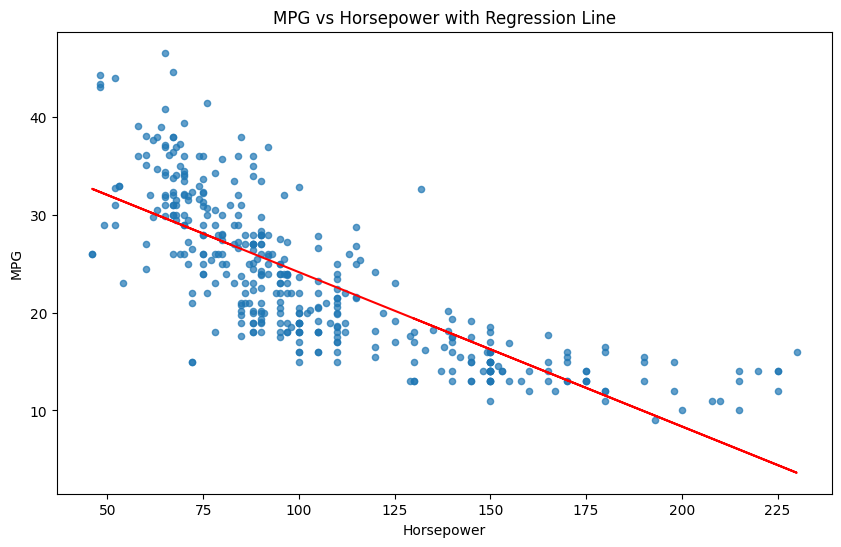

In [14]:
fig, ax = plt.subplots(figsize=(10,6))  # make figure wider and taller
ax.scatter(auto["horsepower"], auto["mpg"], s=20, alpha=0.7)  # smaller dots, slightly transparent
ax.plot(auto["horsepower"], model.predict(sm.add_constant(auto["horsepower"])), color='red')  # regression line
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.set_title("MPG vs Horsepower with Regression Line")
plt.show()

## Part (c) — Diagnostic Plots
These plots help evaluate assumptions such as linearity, constant variance, and normality of residuals.


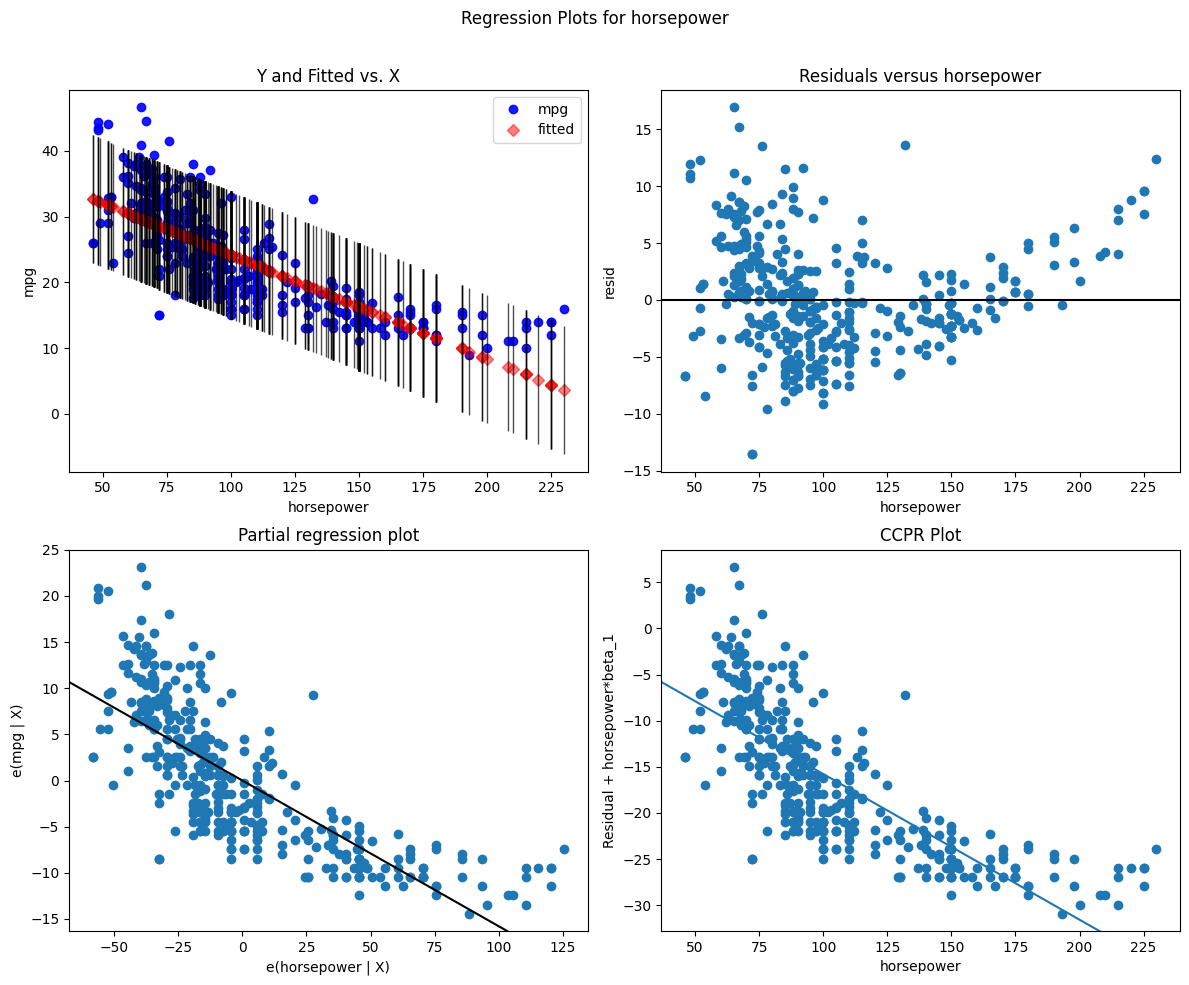

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10))  # make the figure larger
sm.graphics.plot_regress_exog(model, "horsepower", fig=fig)
plt.show()


### Comments on Diagnostics

- There appears to be some curvature in the residuals, suggesting the relationship may not be perfectly linear.
- There is some evidence of non-constant variance (funnel shape), which means prediction accuracy varies across horsepower values.
- A few points may be potential outliers influencing the model.

Overall, the model shows a clear negative relationship, but improvements such as polynomial regression might yield a better fit.